# Probelem Statement
Output variable -> y

y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [167]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [168]:
data = pd.read_csv('bank-full.csv',sep=';')   
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [169]:
data.shape

(45211, 17)

In [170]:
#drop unwanted columns
data=data.drop(['job','age','marital','education','balance','contact','day','month','duration','poutcome'],axis=1)

In [171]:
data.head()

,default,housing,loan,campaign,pdays,previous,y
0,no,yes,no,1,-1,0,no
1,no,yes,no,1,-1,0,no
2,no,yes,yes,1,-1,0,no
3,no,yes,no,1,-1,0,no
4,no,no,no,1,-1,0,no


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   default   45211 non-null  object
 1   housing   45211 non-null  object
 2   loan      45211 non-null  object
 3   campaign  45211 non-null  int64 
 4   pdays     45211 non-null  int64 
 5   previous  45211 non-null  int64 
 6   y         45211 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


# encoding

In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
encoder=LabelEncoder()

In [175]:
data['default']=encoder.fit_transform(data['default'])

In [176]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [177]:
data['housing']=encoder.fit_transform(data['housing'])

In [178]:
data['loan']=encoder.fit_transform(data['loan'])

In [179]:
data['y']=encoder.fit_transform(data['y'])

In [180]:
data.head()

,default,housing,loan,campaign,pdays,previous,y
0,0,1,0,1,-1,0,0
1,0,1,0,1,-1,0,0
2,0,1,1,1,-1,0,0
3,0,1,0,1,-1,0,0
4,0,0,0,1,-1,0,0


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   default   45211 non-null  int32
 1   housing   45211 non-null  int32
 2   loan      45211 non-null  int32
 3   campaign  45211 non-null  int64
 4   pdays     45211 non-null  int64
 5   previous  45211 non-null  int64
 6   y         45211 non-null  int32
dtypes: int32(4), int64(3)
memory usage: 1.7 MB


In [182]:
data.describe()

,default,housing,loan,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.018027,0.555838,0.160226,2.763841,40.197828,0.580323,0.116985
std,0.133049,0.496878,0.366820,3.098021,100.128746,2.303441,0.321406
min,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,2.000000,-1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,3.000000,-1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,63.000000,871.000000,275.000000,1.000000


In [183]:
data.corr()

,default,housing,loan,campaign,pdays,previous,y
default,1.000000,-0.006025,0.077234,0.016822,-0.029979,-0.018329,-0.022419
housing,-0.006025,1.000000,0.041323,-0.023599,0.124178,0.037076,-0.139173
loan,0.077234,0.041323,1.000000,0.009980,-0.022754,-0.011043,-0.068185
campaign,0.016822,-0.023599,0.009980,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.029979,0.124178,-0.022754,-0.088628,1.000000,0.454820,0.103621
previous,-0.018329,0.037076,-0.011043,-0.032855,0.454820,1.000000,0.093236
y,-0.022419,-0.139173,-0.068185,-0.073172,0.103621,0.093236,1.000000


In [184]:
data.isnull().sum()

default     0
housing     0
loan        0
campaign    0
pdays       0
previous    0
y           0
dtype: int64

# Model

In [185]:
X=data.iloc[:,:6:]
Y=data.iloc[:,6]

In [186]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

# Now deal with Imbalanced data with SMOTE
SMOTE stands for Synthetic Minority Oversampling Technique.This is a statistical technique for increasing the number of cases in your dataset in a balanced way.The module works by generating new unstances from existing minority cases that you suppy as input.

In [187]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [188]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [189]:
classifier.predict_proba(X)

array([[0.92089047, 0.07910953],
       [0.92089047, 0.07910953],
       [0.95628792, 0.04371208],
       ...,
       [0.79087523, 0.20912477],
       [0.86374976, 0.13625024],
       [0.58871095, 0.41128905]])

# perform EDA and train test split

In [190]:
#Predict for X dataset
y_pred = classifier.predict(X)

In [191]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted_prob': classifier.predict(X)})

In [192]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [193]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39879    43]
 [ 5267    22]]


In [194]:
from sklearn.metrics import precision_score
precision_score(Y,y_pred)

0.3384615384615385

In [195]:
from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

0.8825507066864259

In [196]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.34      0.00      0.01      5289

    accuracy                           0.88     45211
   macro avg       0.61      0.50      0.47     45211
weighted avg       0.82      0.88      0.83     45211



In [197]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

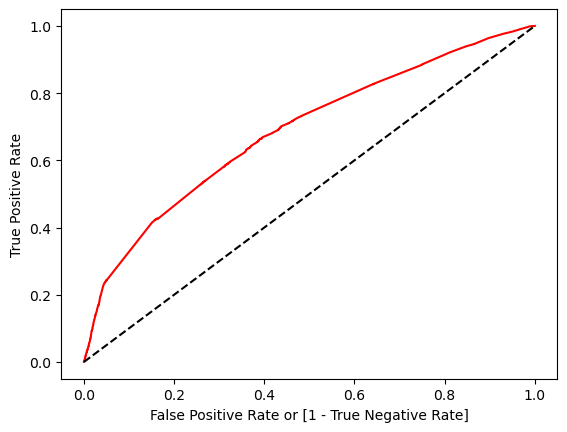

In [198]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [199]:
auc

0.5015412380669059

In [200]:
thresholds

array([1.99999998e+00, 9.99999979e-01, 8.52882946e-01, ...,
       4.71227022e-04, 3.63285268e-04, 2.69216031e-05])

In [201]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train, y_train)

In [202]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=0)
clf.fit(X_res,y_res)
y_pred1=clf.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [203]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test,y_pred1)
print (classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.64      0.75     11969
           1       0.19      0.63      0.29      1595

    accuracy                           0.64     13564
   macro avg       0.56      0.63      0.52     13564
weighted avg       0.84      0.64      0.70     13564



In [204]:
#now find out probability of predicted 0's and 1's
clf.predict_proba(X)[0]

array([0.61310441, 0.38689559])

In [205]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted': clf.predict(X),
                        'p_0': [n[0] for n in clf.predict_proba(X)],
                        'p_1': [n[1] for n in clf.predict_proba(X)]})

In [206]:
y_pred_df

,actual,predicted,p_0,p_1
0,0,0,0.613104,0.386896
1,0,0,0.613104,0.386896
2,0,0,0.780625,0.219375
3,0,0,0.613104,0.386896
4,0,1,0.344801,0.655199
...,...,...,...,...
45206,1,1,0.407657,0.592343
45207,1,1,0.375705,0.624295
45208,1,1,0.353877,0.646123
45209,0,1,0.440408,0.559592
